In [84]:
import pandas as pd
import numpy as np

In [85]:
df_ff=pd.read_csv('../lung_pollution/data/finalfinal_counties.csv')

In [86]:
df_ff.head()

,Unnamed: 0,Unnamed: 0.1,id,county_new,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,...,deaths,cases_per_100k,deaths_per_100k,fully_vaccinated,Population_density,NO2_totMean,NO_totMean,O3_totMean,PM10_totMean,PM2_5_totMean
0,0,0,157,Berlin,Berlin,2010,21.33097,0.0,4.689645,48.14162,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
1,1,1,157,Berlin,Berlin,2011,21.10792,0.0,5.591758,46.78272,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
2,2,2,157,Berlin,Berlin,2012,20.65600,0.0,5.372472,45.26885,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
3,3,3,157,Berlin,Berlin,2013,19.16632,0.0,4.376160,47.91164,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
4,4,4,157,Berlin,Berlin,2014,20.46666,0.0,15.755060,47.80345,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552


In [87]:
df_ff.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)

In [88]:

X = df_ff[['NO2_totMean', 'NO_totMean', 'O3_totMean','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y = df_ff[['cases_per_100k']]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X)  # Fit scaler to feature
scaled_num = scaler.transform(X)  #Scale
X = pd.DataFrame(scaled_num, columns = X.columns)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

# Hyperparameter Grid
grid = {'n_estimators': [50, 100, 150, 200], 
       'min_samples_leaf': [1,2,5,10,15],
       'min_samples_split': [2,5,10]}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 
# Fit data to Grid Search
search.fit(X, y)

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_t

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2')

In [27]:
search.best_score_

0.49949164815891683

In [28]:
search.best_params_

{'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 100}

In [29]:
search.score(X,y)

0.9460246630397174


# KNN

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
neigh = KNeighborsRegressor()
# Hyperparameter Grid
grid = {'n_neighbors': [2, 3, 4],
        'weights': [ 'distance'],
        'leaf_size': [10, 20, 30],
        'p': [1,2]
       }
# Instanciate Grid Search
search = GridSearchCV(neigh, grid,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          )
# Fit data to Grid Search
search.fit(X, y)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'leaf_size': [10, 20, 30], 'n_neighbors': [2, 3, 4],
                         'p': [1, 2], 'weights': ['distance']},
             scoring='r2')

In [31]:
print(search.best_estimator_)
print(search.best_score_)
print(search.score(X,y))

KNeighborsRegressor(leaf_size=10, n_neighbors=4, p=1, weights='distance')
-0.6809163658406799
1.0


In [32]:
X_train = df_ff[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax','PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_poll = df_ff[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
X_test_vaxx = df_ff[['NO2_totMean', 'NO_totMean', 'O3_daily8HrMax', 'PM2_5_totMean', 'fully_vaccinated', 'Population_density']]
y_train = df_ff[['cases_per_100k']]
X_train.head()

,NO2_totMean,NO_totMean,O3_daily8HrMax,PM2_5_totMean,fully_vaccinated,Population_density
0,20.026733,10.731544,161.912580,16.652552,0.688,290.118803
1,20.026733,10.731544,161.986524,16.652552,0.688,290.118803
2,20.026733,10.731544,162.082523,16.652552,0.688,290.118803
3,20.026733,10.731544,157.565400,16.652552,0.688,290.118803
4,20.026733,10.731544,166.539500,16.652552,0.688,290.118803


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X_train)  # Fit scaler to feature
scaled_num = scaler.transform(X_train)  #Scale
X_train = pd.DataFrame(scaled_num, columns = X_train.columns)

In [90]:
from sklearn.ensemble import  RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=201)

forest.fit(X_train,y_train)

print('R2 RandomForest: ', forest.score(X_train,y_train))


/var/folders/yr/j4ck4znx5_d2k5hq16k_4bmr0000gn/T/ipykernel_74495/3732284810.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


R2 RandomForest:  0.9999445633831714


In [91]:
X_test_poll['PM2_5_totMean'] = 5
X_test_poll['NO2_totMean'] = 10
X_test_poll['O3_daily8HrMax'] = 100
X_test_vaxx['fully_vaccinated'] = 1
X_test_poll.head()

,NO2_totMean,NO_totMean,O3_daily8HrMax,PM2_5_totMean,fully_vaccinated,Population_density
0,10,10.731544,100,5,0.688,290.118803
1,10,10.731544,100,5,0.688,290.118803
2,10,10.731544,100,5,0.688,290.118803
3,10,10.731544,100,5,0.688,290.118803
4,10,10.731544,100,5,0.688,290.118803


In [92]:
X_test_vaxx.head()


,NO2_totMean,NO_totMean,O3_daily8HrMax,PM2_5_totMean,fully_vaccinated,Population_density
0,20.026733,10.731544,161.912580,16.652552,1,290.118803
1,20.026733,10.731544,161.986524,16.652552,1,290.118803
2,20.026733,10.731544,162.082523,16.652552,1,290.118803
3,20.026733,10.731544,157.565400,16.652552,1,290.118803
4,20.026733,10.731544,166.539500,16.652552,1,290.118803


In [93]:
scaled_test_poll = scaler.transform(X_test_poll)
scaled_test_vaxx = scaler.transform(X_test_vaxx)

In [94]:
X_test_vaxx

,NO2_totMean,NO_totMean,O3_daily8HrMax,PM2_5_totMean,fully_vaccinated,Population_density
0,20.026733,10.731544,161.912580,16.652552,1,290.118803
1,20.026733,10.731544,161.986524,16.652552,1,290.118803
2,20.026733,10.731544,162.082523,16.652552,1,290.118803
3,20.026733,10.731544,157.565400,16.652552,1,290.118803
4,20.026733,10.731544,166.539500,16.652552,1,290.118803
...,...,...,...,...,...,...
4365,15.177349,11.589918,179.944100,11.515066,1,789.975585
4366,15.177349,11.589918,185.357600,11.515066,1,789.975585
4367,15.177349,11.589918,193.422200,11.515066,1,789.975585
4368,15.177349,11.589918,186.405700,11.515066,1,789.975585


In [95]:
y_pred_poll = forest.predict(scaled_test_poll)
y_pred_vaxx = forest.predict(scaled_test_vaxx)

/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/saraisidebroggini/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:ylabel='Count'>

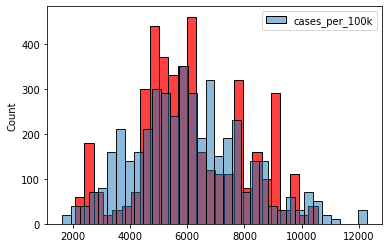

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_pred_poll, color='red')
sns.histplot(y_train, color='blue')

In [46]:
print(y_pred_poll.mean())
print(y_pred_poll.std())

6167.167613615555
1860.255334818062


In [76]:
print(y_train.mean())
print(y_train.std())

cases_per_100k    6046.216149
dtype: float64
cases_per_100k    1968.737883
dtype: float64


<AxesSubplot:ylabel='Count'>

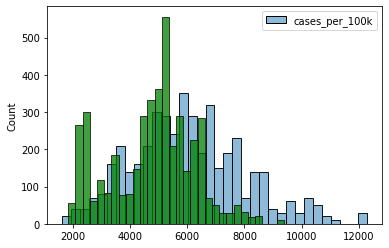

In [77]:
sns.histplot(y_train, color='blue')
sns.histplot(y_pred_vaxx, color='green')

In [100]:
y_df_train = pd.DataFrame(y_train)

In [96]:
y_df_pred_vaxx =  pd.DataFrame(y_pred_vaxx)

In [97]:
df_melt =y_df_pred_vaxx

In [101]:
df_melt['train'] = y_df_train

In [104]:
df_melt['pred'] = y_pred_vaxx

In [107]:
df_melt.drop(0,axis=1,inplace=True)

In [110]:
df_melt['pred_poll'] = y_pred_poll

In [111]:
df_melt

,train,pred,pred_poll
0,6640.688066,6870.933308,6875.730011
1,6640.688066,6870.933308,6875.730011
2,6640.688066,6870.933308,6875.730011
3,6640.688066,6870.933308,6875.730011
4,6640.688066,6870.933308,6875.730011
...,...,...,...
4365,6090.569875,6870.933308,6875.730011
4366,6090.569875,6870.933308,6875.730011
4367,6090.569875,6870.933308,6875.730011
4368,6090.569875,6870.933308,6875.730011


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

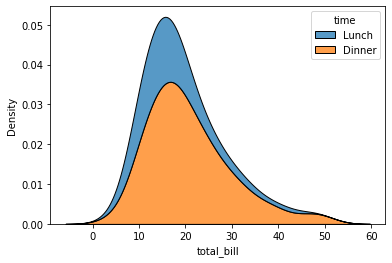

In [62]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

In [75]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
sns.kdeplot(data=df_melt, x="", hue="", multiple="stack")

In [112]:
df_ff

,id,county_new,county,year,NO2_annualMean,NO2_hrOver200,NO_annualMean,O3_annualMean,O3_daysOver120,O3_dailyMaxAnnualMean,...,deaths,cases_per_100k,deaths_per_100k,fully_vaccinated,Population_density,NO2_totMean,NO_totMean,O3_totMean,PM10_totMean,PM2_5_totMean
0,157,Berlin,Berlin,2010,21.330970,0.0,4.689645,48.14162,1.321674,75.383964,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
1,157,Berlin,Berlin,2011,21.107920,0.0,5.591758,46.78272,1.405013,75.515257,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
2,157,Berlin,Berlin,2012,20.656000,0.0,5.372472,45.26885,1.513209,75.685711,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
3,157,Berlin,Berlin,2013,19.166320,0.0,4.376160,47.91164,0.142857,73.145140,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
4,157,Berlin,Berlin,2014,20.466660,0.0,15.755060,47.80345,0.000000,71.659810,...,3759,6640.688066,103.703091,0.688,290.118803,20.026733,10.731544,49.340399,21.199402,16.652552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,285,Aachen,St√§dteRegion Aachen,2015,19.503560,0.0,18.259300,55.32369,3.500000,74.671370,...,622,6090.569875,111.743687,0.715,789.975585,15.177349,11.589918,54.640123,17.472704,11.515066
4366,285,Aachen,St√§dteRegion Aachen,2016,19.119410,0.0,20.256560,53.63288,1.000000,73.430130,...,622,6090.569875,111.743687,0.715,789.975585,15.177349,11.589918,54.640123,17.472704,11.515066
4367,285,Aachen,St√§dteRegion Aachen,2017,19.371040,0.0,20.455340,56.32148,1.500000,76.194330,...,622,6090.569875,111.743687,0.715,789.975585,15.177349,11.589918,54.640123,17.472704,11.515066
4368,285,Aachen,St√§dteRegion Aachen,2018,18.783950,0.0,18.301830,60.82965,5.500000,83.249880,...,622,6090.569875,111.743687,0.715,789.975585,15.177349,11.589918,54.640123,17.472704,11.515066


<AxesSubplot:>

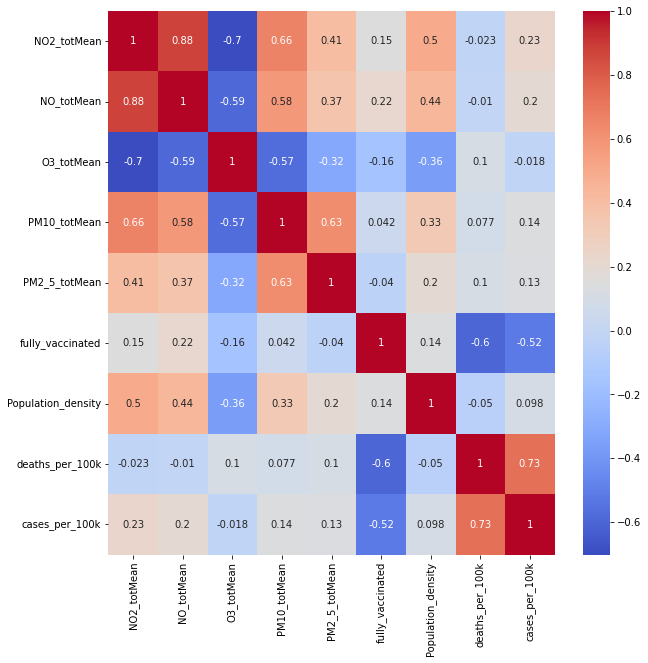